In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sensors_201206.csv', sep='|')

In [3]:
df

,CONFIG_ID,"TO_CHAR(DATE_AND_TIME,'MM/DD/YYYY')",LINK_ID,LAT,LONGI,DIRECTION,ONSTREET,POSTMILE
0,29,06/05/2012,715898,-118.021304,33.879966,1,I-5,0.71
1,30,06/07/2012,715898,-118.021304,33.879966,1,I-5,0.71
2,31,06/09/2012,715898,-118.021304,33.879966,1,I-5,0.71
3,32,06/16/2012,715898,-118.021304,33.879966,1,I-5,0.71
4,33,06/27/2012,715898,-118.021304,33.879966,1,I-5,0.71
...,...,...,...,...,...,...,...,...
23427,33,06/27/2012,1217490,-117.883314,33.910511,0,57,21.35
23428,34,06/29/2012,1217490,-117.883314,33.910511,0,57,21.35
23429,33,06/27/2012,1217669,0.000000,0.000000,1,405,20.65
23430,34,06/29/2012,1217669,0.000000,0.000000,1,405,20.65


In [4]:
df = df[df.LAT != 0]

In [5]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LAT, df.LONGI))

In [6]:
gdf

,CONFIG_ID,"TO_CHAR(DATE_AND_TIME,'MM/DD/YYYY')",LINK_ID,LAT,LONGI,DIRECTION,ONSTREET,POSTMILE,geometry
0,29,06/05/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
1,30,06/07/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
2,31,06/09/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
3,32,06/16/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
4,33,06/27/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
...,...,...,...,...,...,...,...,...,...
23425,31,06/09/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)
23426,32,06/16/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)
23427,33,06/27/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)
23428,34,06/29/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)


In [7]:
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)

In [8]:
gdf

,CONFIG_ID,"TO_CHAR(DATE_AND_TIME,'MM/DD/YYYY')",LINK_ID,LAT,LONGI,DIRECTION,ONSTREET,POSTMILE,geometry
0,29,06/05/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
1,30,06/07/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
2,31,06/09/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
3,32,06/16/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
4,33,06/27/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
...,...,...,...,...,...,...,...,...,...
23425,31,06/09/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)
23426,32,06/16/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)
23427,33,06/27/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)
23428,34,06/29/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)


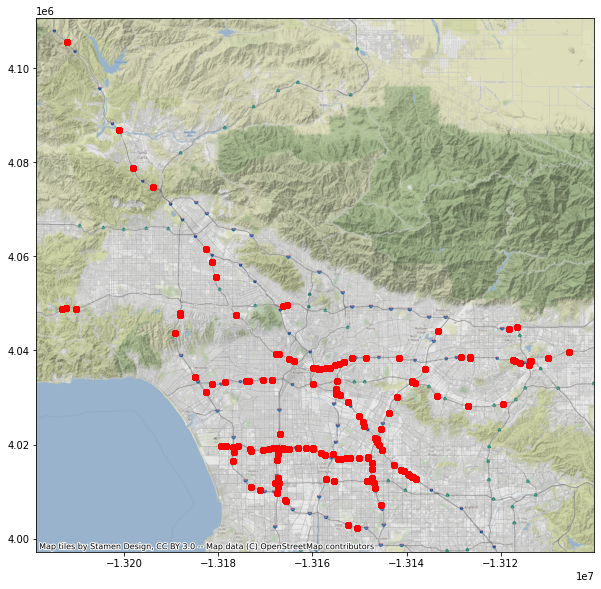

In [9]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf[:1000].plot(ax=ax, color='red')
cx.add_basemap(ax, zoom=12)

In [10]:
long_max = df.LAT.max()
long_min = df.LAT.min()
lat_max = df.LONGI.max()
lat_min = df.LONGI.min()

QUESTIONS:

2 Sensors are placed in 0,0 that seems like an error

How do we determine which direttion is which?

What is the significance of each observations here? Multiple of the same sensor means what?

What is CONFIG_ID? What is LINK_ID?

Sensors are around LA so seems simillar to the METR LA area

# Sensors

In [11]:
df2 = pd.read_csv('events_201206_new.csv', sep='|')

In [12]:
df2

,EVENTID,LAT,LONGI,"TO_CHAR(STTIME,'YYYYMMDDHH24:MI')",ONSTREET_PENNY,DIRECTION,ADMINCITY,DESCRIPTION,AFFECTEDLANECNT,EVENT_STATUS
0,13,33.917426,-117.927353,20120601 01:01,BONITA,130,Orange County Communications Center,1125 - Traffic Hazard,0,2
1,14,33.917422,-117.933006,20120601 01:02,IMPERIAL,130,Orange County Communications Center,1125 - Traffic Hazard,0,2
2,14,34.121471,-117.513667,20120605 01:11,I15,0,Inland Communications Center,CLOSURE - Closure of a Road,0,2
3,15,33.730247,-117.989257,20120606 01:24,EDINGER,130,Orange County Communications Center,1179 - Traffic Collision - 1141 Rolling,0,2
4,16,34.024961,-117.729588,20120605 01:19,SR60,2,Rancho Cucamonga,1125 - Traffic Hazard,0,2
...,...,...,...,...,...,...,...,...,...,...
28041,121028,34.152512,-118.467770,20120630 14:23,I405,0,LOS ANGELES,Accident 405 N @ SEPULVEDA 3 Left lane(s) bloc...,2,2
28042,121029,34.289836,-118.409889,20120630 14:36,I210,2,LOS ANGELES,Accident 210 E @ SR 118 2 Right lane(s) blocke...,2,2
28043,121030,34.143278,-118.187108,20120630 17:12,SR134,2,LOS ANGELES,Accident 134 E @ FIGUEROA ST 1 Right lane(s) b...,1,2
28044,121031,33.993246,-118.403709,20120630 17:35,I405,1,LOS ANGELES,Accident 405 S @ BRADDOCK DR CARPOOL lane(s) b...,1,2


In [13]:

df2 = df2[df2.LAT.between(lat_min, lat_max)]
df2 = df2[df2.LONGI.between(long_min, long_max)]

In [14]:

gdf2 = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.LONGI, df2.LAT))
gdf2 = gdf2.set_crs(epsg=4326)
gdf2 = gdf2.to_crs(epsg=3857)

In [15]:
gdf2

,EVENTID,LAT,LONGI,"TO_CHAR(STTIME,'YYYYMMDDHH24:MI')",ONSTREET_PENNY,DIRECTION,ADMINCITY,DESCRIPTION,AFFECTEDLANECNT,EVENT_STATUS,geometry
0,13,33.917426,-117.927353,20120601 01:01,BONITA,130,Orange County Communications Center,1125 - Traffic Hazard,0,2,POINT (-13127612.887 4017719.737)
1,14,33.917422,-117.933006,20120601 01:02,IMPERIAL,130,Orange County Communications Center,1125 - Traffic Hazard,0,2,POINT (-13128242.176 4017719.201)
2,14,34.121471,-117.513667,20120605 01:11,I15,0,Inland Communications Center,CLOSURE - Closure of a Road,0,2,POINT (-13081561.572 4045124.299)
3,15,33.730247,-117.989257,20120606 01:24,EDINGER,130,Orange County Communications Center,1179 - Traffic Collision - 1141 Rolling,0,2,POINT (-13134504.008 3992638.047)
4,16,34.024961,-117.729588,20120605 01:19,SR60,2,Rancho Cucamonga,1125 - Traffic Hazard,0,2,POINT (-13105597.787 4032154.171)
...,...,...,...,...,...,...,...,...,...,...,...
28041,121028,34.152512,-118.467770,20120630 14:23,I405,0,LOS ANGELES,Accident 405 N @ SEPULVEDA 3 Left lane(s) bloc...,2,2,POINT (-13187771.832 4049299.092)
28042,121029,34.289836,-118.409889,20120630 14:36,I210,2,LOS ANGELES,Accident 210 E @ SR 118 2 Right lane(s) blocke...,2,2,POINT (-13181328.548 4067786.633)
28043,121030,34.143278,-118.187108,20120630 17:12,SR134,2,LOS ANGELES,Accident 134 E @ FIGUEROA ST 1 Right lane(s) b...,1,2,POINT (-13156528.681 4048057.025)
28044,121031,33.993246,-118.403709,20120630 17:35,I405,1,LOS ANGELES,Accident 405 S @ BRADDOCK DR CARPOOL lane(s) b...,1,2,POINT (-13180640.594 4027895.165)


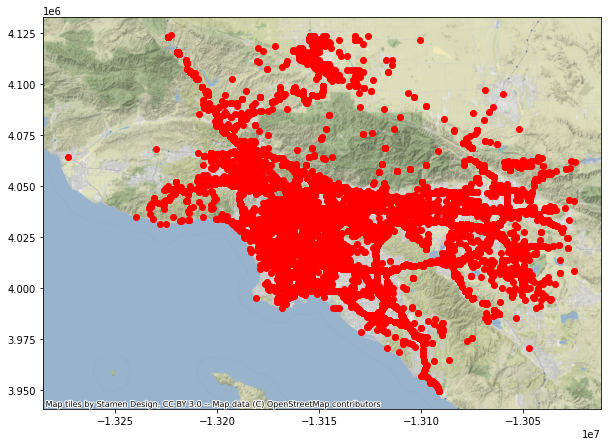

In [16]:

fig, ax = plt.subplots(1, figsize=(10,10))
gdf2[:].plot(ax=ax, color='red')
cx.add_basemap(ax, zoom=12)

In [17]:
metr_sensors = pd.read_csv('graph_sensor_locations.csv')

In [18]:
metr_sensors

,index,sensor_id,latitude,longitude
0,0,773869,34.15497,-118.31829
1,1,767541,34.11621,-118.23799
2,2,767542,34.11641,-118.23819
3,3,717447,34.07248,-118.26772
4,4,717446,34.07142,-118.26572
...,...,...,...,...
202,202,717592,34.14604,-118.22430
203,203,717595,34.14163,-118.18290
204,204,772168,34.16542,-118.47985
205,205,718141,34.15133,-118.37456


In [19]:
sen_lat_min = metr_sensors.latitude.min()
sen_lat_max = metr_sensors.latitude.max()
sen_lon_min = metr_sensors.longitude.min()
sen_lon_max = metr_sensors.longitude.max()

In [20]:
df2 = df2[df2.LAT.between(sen_lat_min, sen_lat_max)]
df2 = df2[df2.LONGI.between(sen_lon_min, sen_lon_max)]

In [21]:
#df2.ONSTREET_PENNY.unique()

In [22]:
df2.groupby('ONSTREET_PENNY').count().sort_values('LAT', ascending=False)[:20]

,EVENTID,LAT,LONGI,"TO_CHAR(STTIME,'YYYYMMDDHH24:MI')",DIRECTION,ADMINCITY,DESCRIPTION,AFFECTEDLANECNT,EVENT_STATUS,geometry
ONSTREET_PENNY,,,,,,,,,,
I405,938,938,938,938,938,938,937,938,938,938
US101,908,908,908,908,908,908,908,908,908,908
I5,542,542,542,542,542,542,542,542,542,542
SR134,340,340,340,340,340,340,340,340,340,340
SR110,200,200,200,200,200,200,200,200,200,200
SR2,165,165,165,165,165,165,165,165,165,165
I110,129,129,129,129,129,129,126,129,129,129
SR170,113,113,113,113,113,113,113,113,113,113
I210,83,83,83,83,83,83,83,83,83,83


In [23]:
gdf3 = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.LONGI, df2.LAT))
gdf3 = gdf3.set_crs(epsg=4326)
gdf3 = gdf3.to_crs(epsg=3857)

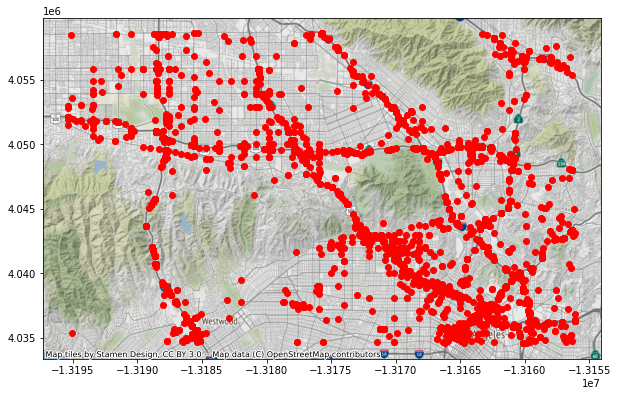

In [24]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf3[:].plot(ax=ax, color='red')
cx.add_basemap(ax, zoom=12)

In [25]:
gdf4 = gpd.GeoDataFrame(
   metr_sensors , geometry=gpd.points_from_xy(metr_sensors.longitude, metr_sensors.latitude))
gdf4 = gdf4.set_crs(epsg=4326)
gdf4 = gdf4.to_crs(epsg=3857)

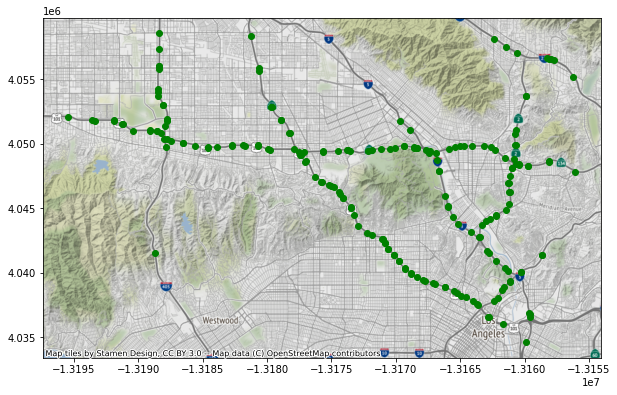

In [26]:

fig, ax = plt.subplots(1, figsize=(10,10))
gdf4[:].plot(ax=ax, color='green')
cx.add_basemap(ax, zoom=12)

In [96]:

highways = ['I110', 'I405', 'I5', 'I210', 'I10', 'US101', 'SR2', 'SR134', 'SR170' ]
#highways = ['US101']
gdf_test = gdf3[gdf3.ONSTREET_PENNY.isin(highways)]
#gdf_test = gdf3[gdf3.ONSTREET_PENNY.str.contains('I')]

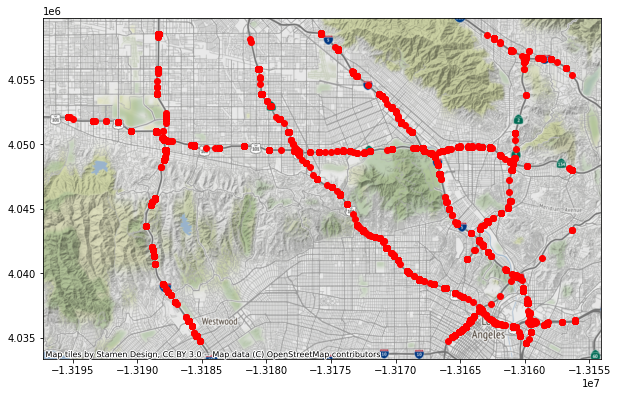

In [97]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf_test[:].plot(ax=ax, color='red')
cx.add_basemap(ax, zoom=12)

In [98]:
gdf_test = gdf_test.dropna()

In [99]:
accident_idx = gdf_test.DESCRIPTION.str.contains('Accident', regex=False)

In [100]:
accident_idx.isna()

243      False
310      False
312      False
408      False
420      False
         ...  
28030    False
28037    False
28040    False
28041    False
28043    False
Name: DESCRIPTION, Length: 3294, dtype: bool

In [101]:
accident_df = gdf_test[accident_idx]
gdf_test = gdf_test[~accident_idx]

In [102]:
# Drop hit and runs
gdf_test.drop(gdf_test.DESCRIPTION.str.contains('Hit and Run'))

KeyError: '[False False False ...  True  True False] not found in axis'

In [94]:
gdf_test.DESCRIPTION

243                       1125 - Traffic Hazard
310                       1125 - Traffic Hazard
312                       1125 - Traffic Hazard
408       1183 - Traffic Collision - No Details
420      1182 - Traffic Collision - No Injuries
                          ...                  
27822     1183 - Traffic Collision - No Details
27825     1183 - Traffic Collision - No Details
27826    1182 - Traffic Collision - No Injuries
27830                     1125 - Traffic Hazard
27847     1183 - Traffic Collision - No Details
Name: DESCRIPTION, Length: 3133, dtype: object

In [30]:
df = pd.read_hdf('metr-la.h5')

In [31]:
df.shape

(34272, 207)

In [32]:
data = np.expand_dims(df.values, axis=-1)

NameError: name 'np' is not defined

In [ ]:
data.shape

(34272, 207, 1)

In [2]:
import numpy as np
import os 

In [8]:
path1 = '../../Simulation_scenarios/motorway/Results/folder_full_run/'

In [13]:
np.load(f'{path1}/incident_info.npy').shape

(10270, 4)

In [ ]:
train = np.load('train.npz')

In [ ]:
dir(train)

['__abstractmethods__',
 '__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_files',
 'allow_pickle',
 'close',
 'f',
 'fid',
 'files',
 'get',
 'items',
 'keys',
 'pickle_kwargs',
 'values',
 'zip']

In [ ]:
list(train.keys())

['x', 'y', 'x_offsets', 'y_offsets']

In [ ]:
train['x'].shape

(23974, 12, 207, 2)

In [37]:
df.index.datetime

AttributeError: 'DatetimeIndex' object has no attribute 'datetime'

In [34]:
len(df.index
)

34272